# Random Forest

Es un ensamble de árboles de decisión. En vez de entrenar un solo árbol (que tiende a sobreajustar), entrenamos muchos árboles y combinamos sus resultados.

## ¿Cómo funciona?
1. Bagging (Bootstrap Aggregating):
    - Cada árbol se entrena con una muestra aleatoria con reemplazo del dataset.
    - Esto reduce la varianza: cada árbol "ve" un dataset distinto.
2. Selección aleatoria de features:
    - En cada división del árbol, no se consideran todas las features, solo un subconjunto aleatorio.
    - Esto evita que todos los árboles sean iguales y reduce correlación entre ellos.
3. Predicción final:
    - En clasificación -> votación mayoritaria.
    - En regresión -> promedio de predicciones.

## Ventajas
- Muy buen rendimiento out-of-the-box.
- Menos overfittinh que un solo árbol.
- Funciona bien con datos grandes y muchas features.
- Da importancia de variables.

## Desventajas
- Menos interpretable que un árbol simple.
- Puede ser más lento con muchos ´´arboles.
- Consume más memoria.

## Hiperparámetros importantes
- `n_estimators`: número de árboles en el bosque (por defecto 100).
- `max_depth`: profundidad máxima de cada árbol.
- `max_features`: n° de features consideradas en cada división.
    - `"sqrt"` (default en clasificación) = raíz cuadrada del n° de features.
    - `"log2"` = logaritmo en base 2.
- `min_samples_split`, `min_samples_leaf`: controlan tamaño mínimo de divisiones y hojas
- `bootstrap`: si se usa muestreo con reemplazo (default=true)

## Ejemplo - Dataset Wine
Entrenar y evaluar un Random Forest

Reporte de clasificación:
               precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        18
     class_1       1.00      1.00      1.00        21
     class_2       1.00      1.00      1.00        15

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54

Matriz de confusión:
 [[18  0  0]
 [ 0 21  0]
 [ 0  0 15]]


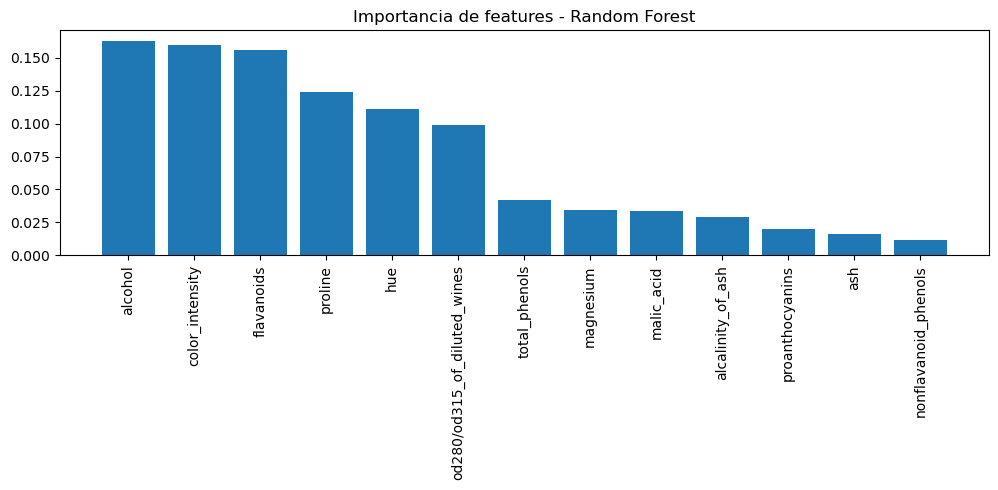

Top 5 features más importantes:
alcohol: 0.163
color_intensity: 0.160
flavanoids: 0.156
proline: 0.124
hue: 0.111


In [2]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# 1. Cargar dataset
wine = load_wine()
X, y = wine.data, wine.target
target_names = wine.target_names

# 2. Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# 3. Entrenar Random Forest
rf = RandomForestClassifier(
    n_estimators=100,      # número de árboles
    max_depth=None,        # sin límite, crecen hasta agotar nodos puros
    random_state=42,
    n_jobs=-1              # usar todos los núcleos
)
rf.fit(X_train, y_train)

# 4. Evaluación
y_pred = rf.predict(X_test)
print("Reporte de clasificación:\n", classification_report(y_test, y_pred, target_names=target_names))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))


importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,5))
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), np.array(wine.feature_names)[indices], rotation=90)
plt.title("Importancia de features - Random Forest")
plt.tight_layout()
plt.show()

print("Top 5 features más importantes:")
for i in range(5):
    print(f"{wine.feature_names[indices[i]]}: {importances[indices[i]]:.3f}")



## Tarea
Usa el dataset Iris con `RandomForestClassifier`:
1. Entrena un modelo con:
    - `n_estimators=200`
    - `max_depth=4`
    - `criterion="entropy"`
2. Evalúa con `classification_report` y `confusion_matrix`.
3. Grafica las importancias de features.
4. Comenta: ¿qué feature(s) son las más importantes y cómo se relaciona esto con lo que vimos en el árbol de decision simple?

Reporte de clasificación:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.78      0.93      0.85        15
   virginica       0.92      0.73      0.81        15

    accuracy                           0.89        45
   macro avg       0.90      0.89      0.89        45
weighted avg       0.90      0.89      0.89        45

Matriz de confusión:
 [[15  0  0]
 [ 0 14  1]
 [ 0  4 11]]


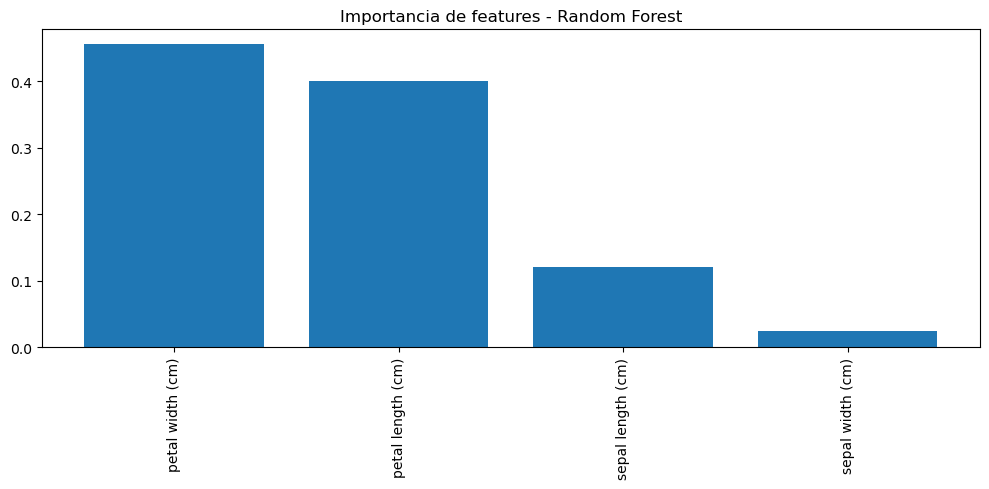

Top 3 features más importantes:
petal width (cm): 0.455
petal length (cm): 0.400
sepal length (cm): 0.121


In [4]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# 1. Cargar dataset
iris = load_iris()
X, y = iris.data, iris.target
target_names = iris.target_names

# 2. Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# 3. Entrenar Random Forest
rf = RandomForestClassifier(
    n_estimators=100,      # número de árboles
    max_depth=None,        # sin límite, crecen hasta agotar nodos puros
    random_state=42,
    n_jobs=-1              # usar todos los núcleos
)
rf.fit(X_train, y_train)

# 4. Evaluación
y_pred = rf.predict(X_test)
print("Reporte de clasificación:\n", classification_report(y_test, y_pred, target_names=target_names))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,5))
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), np.array(iris.feature_names)[indices], rotation=90)
plt.title("Importancia de features - Random Forest")
plt.tight_layout()
plt.show()

print("Top 3 features más importantes:")
for i in range(3):
    print(f"{iris.feature_names[indices[i]]}: {importances[indices[i]]:.3f}")


4. las features mas importantes son petal width, petal length, sepal length, estas se relacionana porque muestra cuales features tienen más ganancia de informacion.